In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# basic files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity
from statsmodels.tsa.stattools import acf,pacf,adfuller

# ARMA
from statsmodels.tsa.arima.model import ARIMA
# error
from sklearn.metrics import mean_squared_error

# Ljung-Box test for model goodness
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


In [3]:
df_tools = pd.read_csv("TOOLS_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [4]:
df_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AL19QO4XLBQPU,5.0,True,"returned, decided against this product",2018-01-28
1,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1I7CVB7X3T81E,5.0,True,Awesome heater for the electrical requirements...,2017-11-30
2,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1AQXO4P5U674E,5.0,True,Keeps the mist of your wood trim and on you. B...,2017-09-12
3,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AIRV678P7C4NK,4.0,True,"So far I hooked it up and tested it , filled a...",2017-07-19
4,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A22I5QDNTNECDW,1.0,True,"i installed this 10 months ago, instructions w...",2017-05-25


In [5]:
# Converting to datetime dtype
df_tools['DATE']=pd.to_datetime(df_tools['DATE'])

In [6]:
# Sorting values by date
df_tools.sort_values(by='DATE',inplace=True)

In [7]:
df_tools=df_tools.set_index('DATE')
df_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,Bosch 1276DVS 12.5 Amp 4-Inch-by-24-Inch Varia...,Bosch,Tools & Home Improvement,45.902274,B0000223H9,A38GS2D6O5N767,5.0,False,"Great power, lightweight, exceptional balance ..."


In [8]:
plt.rcParams['axes.grid'] = True

In [9]:
df_tools = df_tools[['price']]

In [10]:
df_tools_monthly=df_tools.resample('M').sum()
df_tools_quaterly=df_tools.resample('Q').sum()
df_tools_yearly=df_tools.resample('Y').sum()
df_tools_weekly=df_tools.resample('W').sum()

# QUARTERLY 

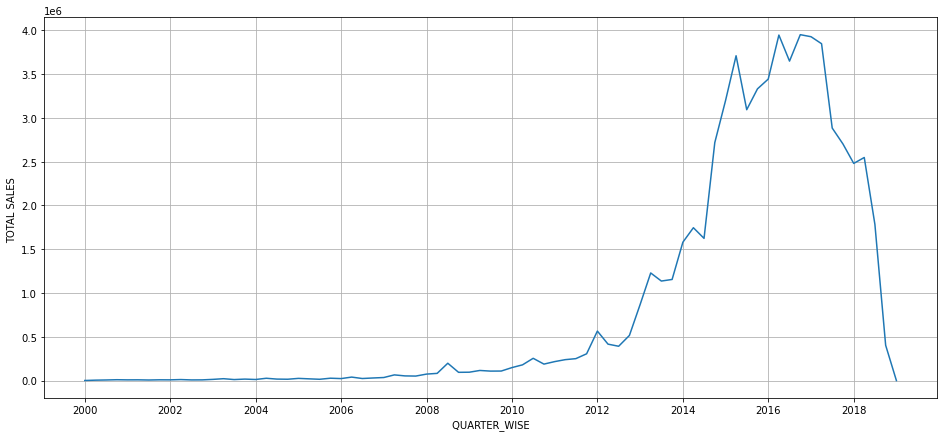

In [11]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_tools_quaterly);

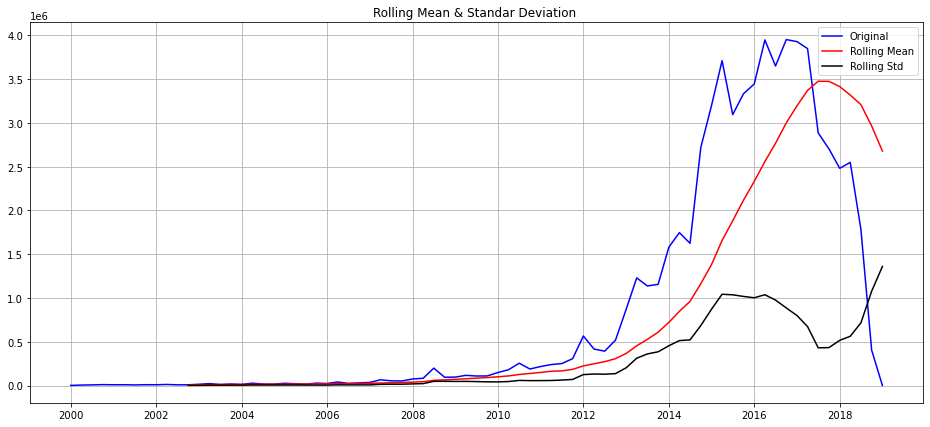

In [12]:
# DETERMINE ROLLING STATISTICS 
rollmean = df_tools_quaterly.rolling(12).mean()
rollstd = df_tools_quaterly.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plot rolling statistics 
orig = plt.plot(df_tools_quaterly,color = "blue",label = "Original")
mean = plt.plot(rollmean,color = "red",label = "Rolling Mean")
std = plt.plot(rollstd,color = "black",label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standar Deviation ")
plt.show(block = False)

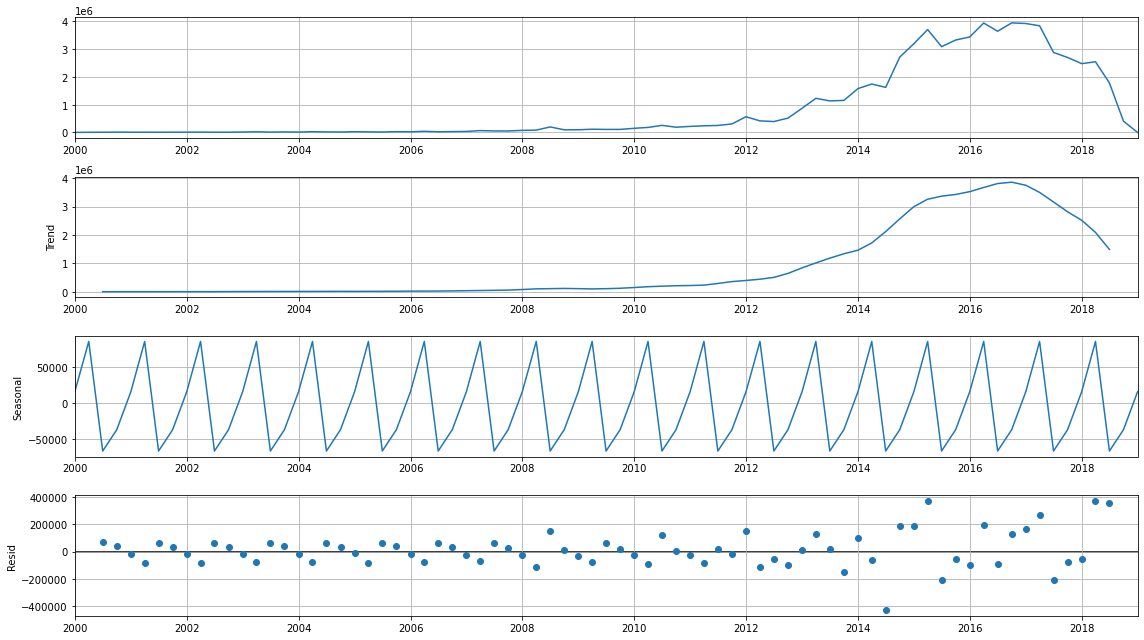

In [13]:
fig_qp=seasonal_decompose(df_tools_quaterly).plot();
fig_qp.set_size_inches((16,9))
fig_qp.tight_layout()
plt.show()

# CHECKING FOR STATIONARITY 

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df_tools_quaterly)

ADF Test Statistic : -3.022699951928681
p-value : 0.03282820541844562
#Lags Used : 10
Number of Observations Used : 66
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## OUR DATA IS STATIONARY 

In [16]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df_tools_quaterly,nlags = 20)
lag_pacf = pacf(df_tools_quaterly,nlags = 20)

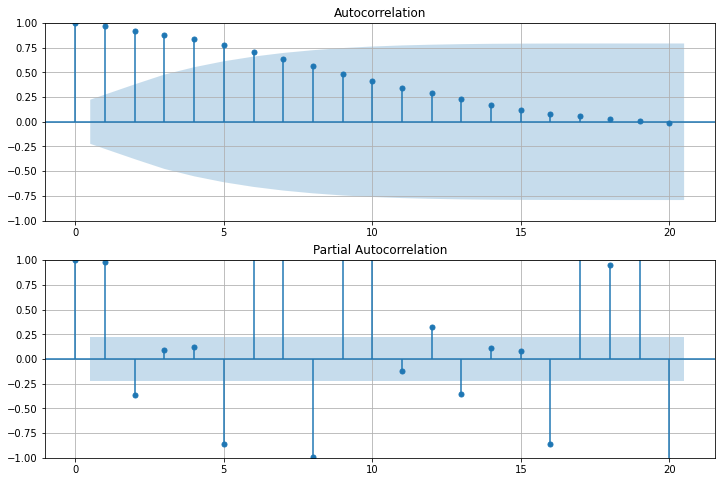

In [17]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_tools_quaterly,lags = 20 ,ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_tools_quaterly,lags = 20 ,ax = ax2)

# FINDING THE  BEST VALUES OF P , Q AND D 

In [18]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df_tools_quaterly,Trace = True,
                         suppress_warnings=True)

In [19]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1057.737
Date:                Sun, 15 Jan 2023   AIC                           2123.474
Time:                        23:15:24   BIC                           2132.797
Sample:                    12-31-1999   HQIC                          2127.200
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8708      0.097     -8.988      0.000      -1.061      -0.681
ma.L1          1.3214      0.141      9.372      0.000       1.045       1.598
ma.L2          0.5678      0.155      3.670      0.000       0.265       0.871
sigma2      9.154e+10   1.96e-12   4.67e+22      0.000    9.15e+10    9.15e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               336.78
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):            2329.31   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.32e+37. Standard errors may be unstable.
"""

In [20]:
from statsmodels.tsa.arima.model import ARIMA

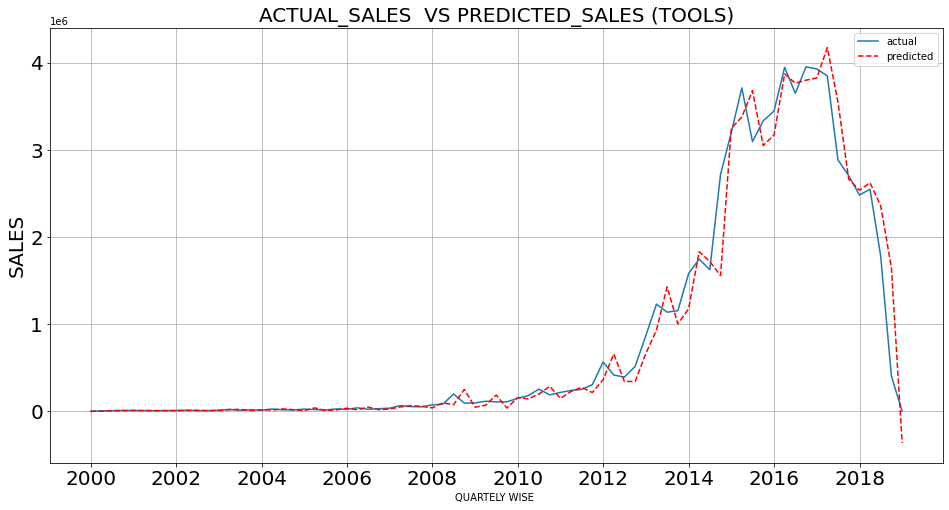

In [21]:
plt.figure(figsize=(16,8))
model = ARIMA(df_tools_quaterly,order=(1,1,2))
results_ARIMA = model.fit()
plt.plot(df_tools_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.legend(["actual",'predicted']);
plt.title("ACTUAL_SALES  VS PREDICTED_SALES (TOOLS)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [22]:
len(results_ARIMA.fittedvalues)

77

In [23]:
p=1;d=1;q=2

m1 = ARIMA(df_tools_quaterly,order=(p,d,q)).fit()

In [24]:
# forecast on the test data
start = 75
end = 95
f1 = m1.predict(start,end)
f1

2018-09-30    1.646386e+06
2018-12-31   -3.632734e+05
2019-03-31    1.269506e+05
2019-06-30    2.234680e+05
2019-09-30    1.394179e+05
2019-12-31    2.126111e+05
2020-03-31    1.488723e+05
2020-06-30    2.043779e+05
2020-09-30    1.560421e+05
2020-12-31    1.981343e+05
2021-03-31    1.614792e+05
2021-06-30    1.933995e+05
2021-09-30    1.656024e+05
2021-12-31    1.898090e+05
2022-03-31    1.687291e+05
2022-06-30    1.870861e+05
2022-09-30    1.711003e+05
2022-12-31    1.850212e+05
2023-03-31    1.728985e+05
2023-06-30    1.834553e+05
2023-09-30    1.742621e+05
Freq: Q-DEC, Name: predicted_mean, dtype: float64

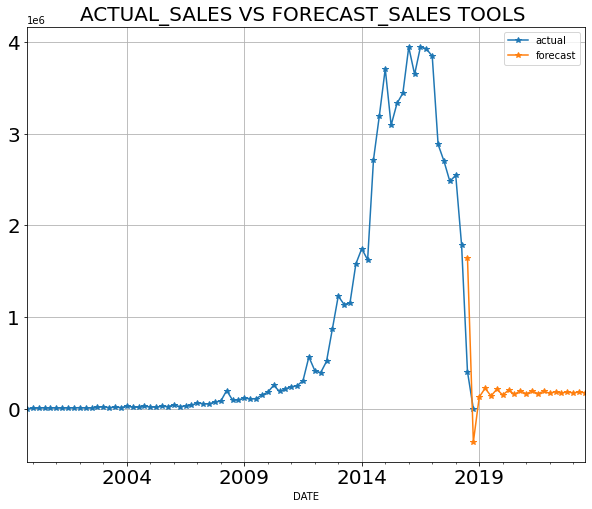

In [25]:
df_tools_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
f1.plot(legend=True,marker = "*");
plt.legend(["actual",'forecast']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_SALES VS FORECAST_SALES TOOLS ",fontsize=20);

### demand analysis 

In [26]:
demand_tools = pd.read_csv("TOOLS_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [27]:
# Converting to datetime dtype
demand_tools['DATE']=pd.to_datetime(demand_tools['DATE'])

# Sorting values by date
demand_tools.sort_values(by='DATE',inplace=True)
demand_tools=demand_tools.set_index('DATE')
demand_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,Bosch 1276DVS 12.5 Amp 4-Inch-by-24-Inch Varia...,Bosch,Tools & Home Improvement,45.902274,B0000223H9,A38GS2D6O5N767,5.0,False,"Great power, lightweight, exceptional balance ..."


In [28]:
demand_tools_monthly=demand_tools['product_id'].resample('M').count()
demand_tools_quaterly=demand_tools['product_id'].resample('Q').count()
demand_tools_yearly=demand_tools['product_id'].resample('Y').count()
demand_tools_weekly=demand_tools['product_id'].resample('W').count()

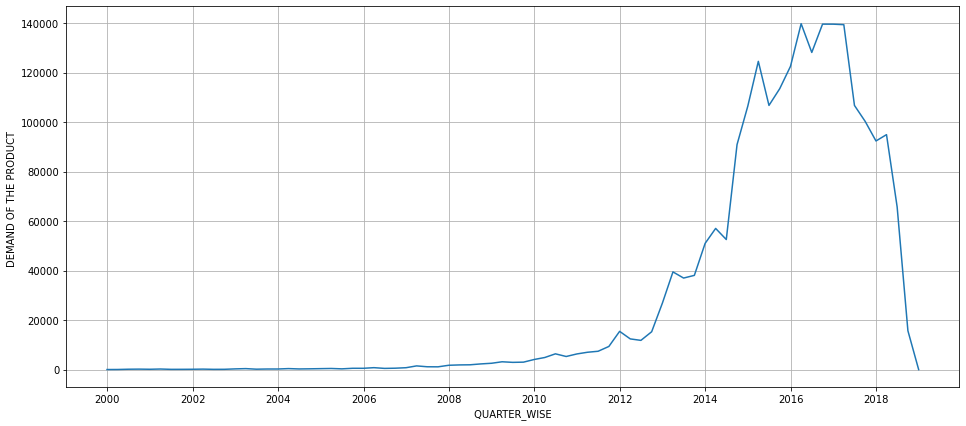

In [29]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("DEMAND OF THE PRODUCT ")
ax1.plot(demand_tools_quaterly);

In [30]:
# STATIONARITY CHECK 

In [31]:
adfuller_test(demand_tools_quaterly)

ADF Test Statistic : -3.2767066941692344
p-value : 0.015952339746583027
#Lags Used : 10
Number of Observations Used : 66
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [32]:
# FINDING THE BEST VALUE OF P , Q AND D 

In [33]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(demand_tools_quaterly,Trace = True,
                         suppress_warnings=True)

In [34]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -802.068
Date:                Sun, 15 Jan 2023   AIC                           1612.136
Time:                        23:15:44   BIC                           1621.459
Sample:                    12-31-1999   HQIC                          1615.862
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8785      0.092     -9.510      0.000      -1.060      -0.697
ma.L1          1.3535      0.147      9.236      0.000       1.066       1.641
ma.L2          0.5774      0.137      4.213      0.000       0.309       0.846
sigma2      1.089e+08   1.27e-09   8.58e+16      0.000    1.09e+08    1.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               405.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):           16029.33   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+32. Standard errors may be unstable.
"""

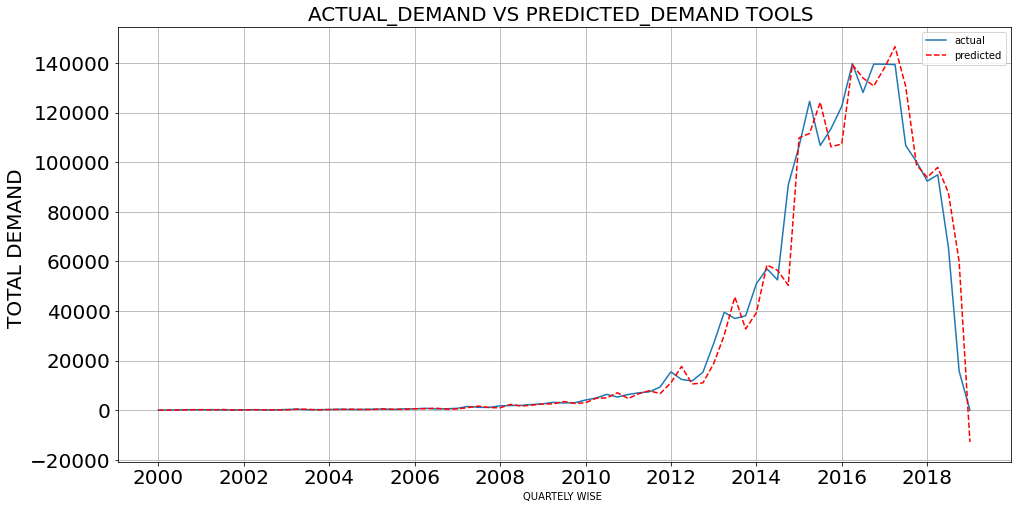

In [35]:
plt.figure(figsize=(16,8))
model= ARIMA(demand_tools_quaterly,order=(1,1,2))
results_ARIMA = model.fit()
plt.plot(demand_tools_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("TOTAL DEMAND ",fontsize=20)
plt.legend(["actual",'predicted']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_DEMAND VS PREDICTED_DEMAND TOOLS ",fontsize=20)
plt.show()

In [36]:
p=1;d=1;q=2

m_D_tool = ARIMA(demand_tools_quaterly,order=(p,d,q)).fit()

In [37]:
# forecast on the test data
start = 75
end = 95
f_demand = m_D_tool.predict(start,end)
f_demand

2018-09-30    59859.970119
2018-12-31   -12823.282662
2019-03-31     5698.645927
2019-06-30     8126.816647
2019-09-30     5993.648148
2019-12-31     7867.654703
2020-03-31     6221.324106
2020-06-30     7667.639449
2020-09-30     6397.039197
2020-12-31     7513.272257
2021-03-31     6532.652079
2021-06-30     7394.135193
2021-09-30     6637.314997
2021-12-31     7302.187936
2022-03-31     6718.091440
2022-06-30     7231.225148
2022-09-30     6780.432849
2022-12-31     7176.457694
2023-03-31     6828.546520
2023-06-30     7134.189427
2023-09-30     6865.679550
Freq: Q-DEC, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ACTUAL_DEMAND VS FORECAST_DEMAND TOOLS ')

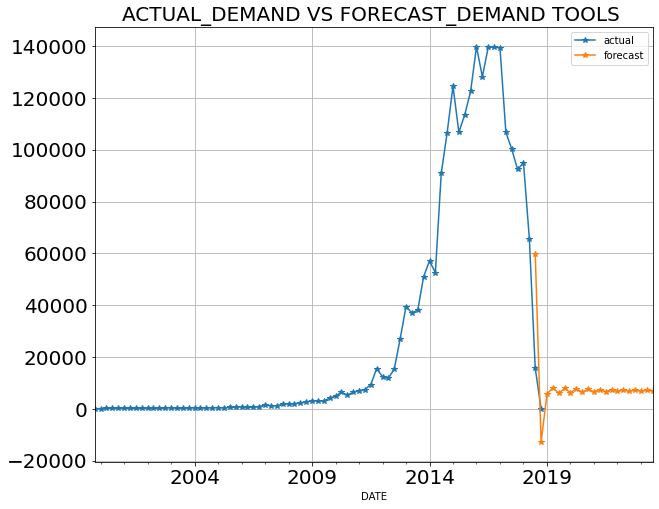

In [38]:
demand_tools_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
f_demand.plot(legend=True,marker = "*");
plt.legend(["actual",'forecast']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_DEMAND VS FORECAST_DEMAND TOOLS ",fontsize=20)

## patio 

In [39]:
df_patio = pd.read_csv("PATIO_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [40]:
df_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5.0,True,I don't spend a lot on my flags because they r...,2011-12-11
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5.0,True,"Super fast processing and shipping, if you are...",2011-07-30
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5.0,True,Great product. I would recommend this product...,2016-05-04
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5.0,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5.0,True,Great display flag for the den.,2015-09-01


In [41]:
# Converting to datetime dtype
df_patio['DATE']=pd.to_datetime(df_patio['DATE'])

In [42]:
# Sorting values by date
df_patio.sort_values(by='DATE',inplace=True)

In [43]:
df_patio=df_patio.set_index('DATE')
df_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
2000-03-15,Earthway 2750 Hand-Operated Bag Spreader/Seede...,Earthway,Amazon Home,3.330000,B0009GZA6O,A1B3GNO9C8YX0N,5.0,False,I use one of these to broadcast the various gr...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...


In [44]:
df_patio = df_patio[['price']]

In [45]:
df_patio_monthly=df_patio.resample('M').sum()
df_patio_quaterly=df_patio.resample('Q').sum()
df_patio_yearly=df_patio.resample('Y').sum()
df_patio_weekly=df_patio.resample('W').sum()

# QUARTERLY 

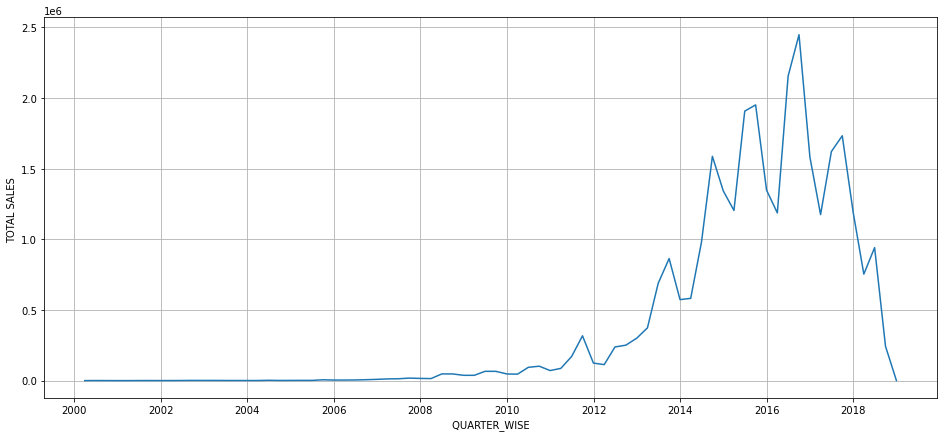

In [46]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly);

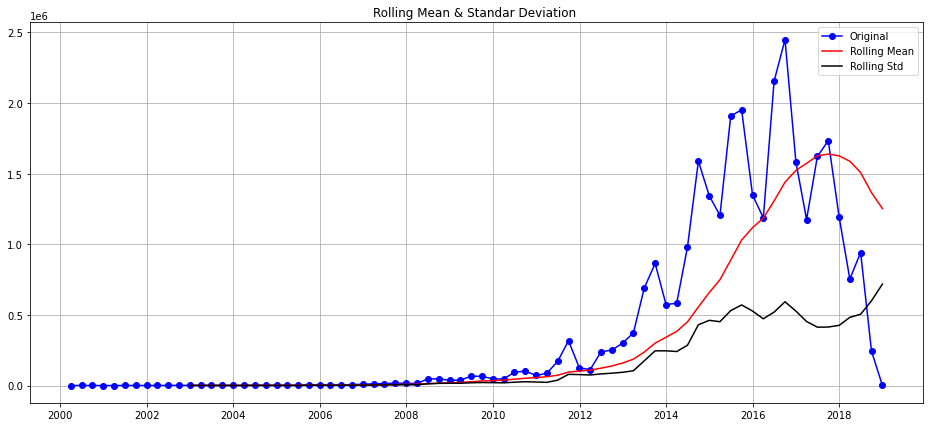

In [47]:
# DETERMINE ROLLING STATISTICS 
rollmean = df_patio_quaterly.rolling(12).mean()
rollstd = df_patio_quaterly.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plot rolling statistics 
orig = plt.plot(df_patio_quaterly,marker='o',color = "blue",label = "Original")
mean = plt.plot(rollmean,color = "red",label = "Rolling Mean")
std = plt.plot(rollstd,color = "black",label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standar Deviation ")
plt.show(block = False)

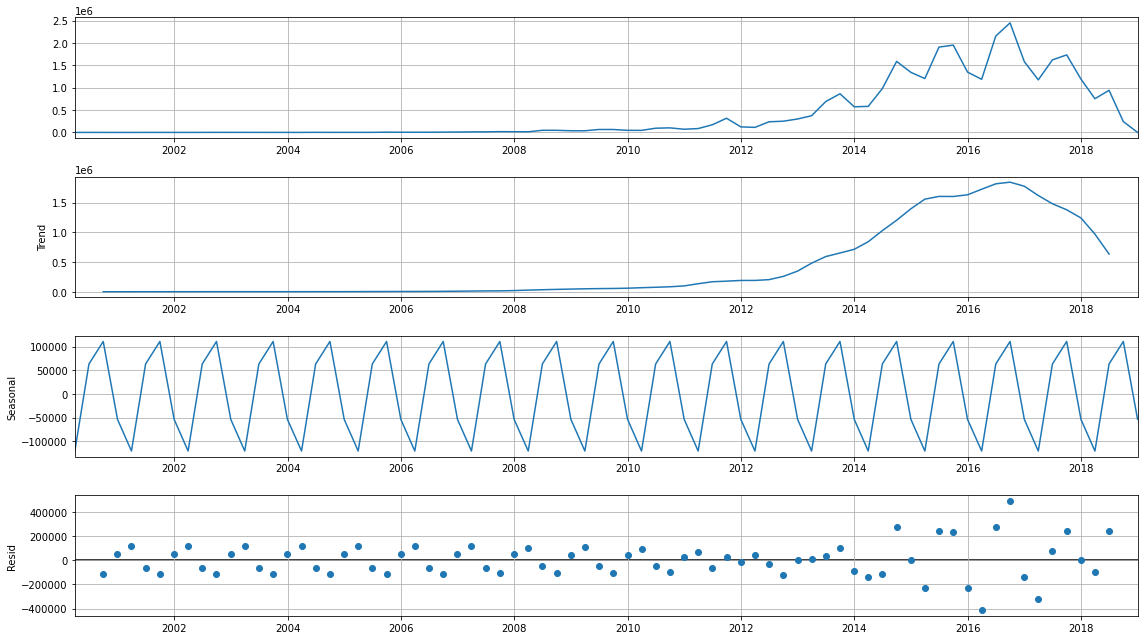

In [48]:
fig_qp=seasonal_decompose(df_patio_quaterly).plot();
fig_qp.set_size_inches((16,9))
fig_qp.tight_layout()
plt.show()

In [49]:
adfuller_test(df_patio_quaterly)

ADF Test Statistic : -2.758130983095417
p-value : 0.06450781381297811
#Lags Used : 11
Number of Observations Used : 64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [50]:
 df_patio_quaterly_diff = df_patio_quaterly['price'] - df_patio_quaterly['price'].shift(1)

In [51]:
## Again test dickey fuller test
adfuller_test(df_patio_quaterly_diff.dropna())

ADF Test Statistic : -3.470162325631665
p-value : 0.008787281381770658
#Lags Used : 12
Number of Observations Used : 62
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [52]:
 df_patio_quaterly_diff = df_patio_quaterly_diff.dropna()

In [53]:
df_patio_quaterly_diff.head()

DATE
2000-06-30    457.870334
2000-09-30   -280.560000
2000-12-31   -164.780334
2001-03-31    -15.860000
2001-06-30    331.760334
Freq: Q-DEC, Name: price, dtype: float64

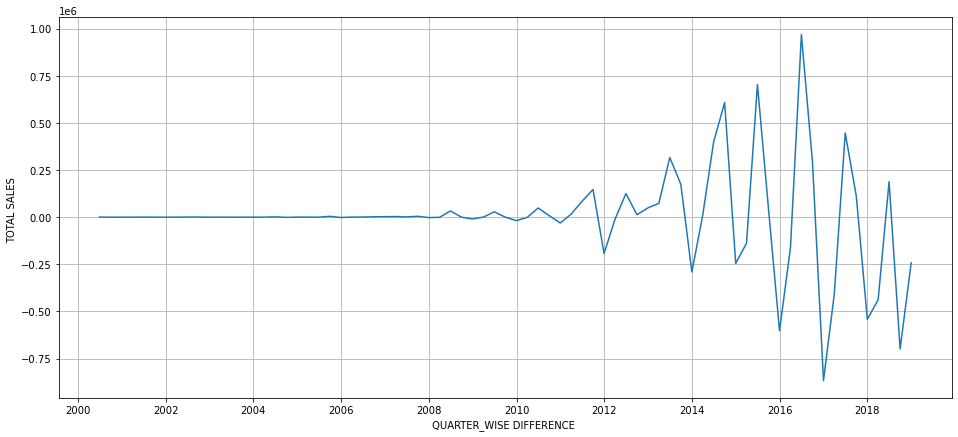

In [54]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE DIFFERENCE  ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly_diff);

# FINDING THE BEST VALUE FOR P , Q , D 

In [55]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df_patio_quaterly_diff,Trace = True,
                         suppress_warnings=True)

In [56]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -1006.737
Date:                Sun, 15 Jan 2023   AIC                           2027.474
Time:                        23:15:53   BIC                           2043.697
Sample:                    06-30-2000   HQIC                          2033.952
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0224      0.117      8.701      0.000       0.792       1.253
ar.L2         -0.7251      0.146     -4.952      0.000      -1.012      -0.438
ar.L3          0.6208      0.114      5.438      0.000       0.397       0.845
ma.L1         -1.0638      0.145     -7.354      0.000      -1.347      -0.780
ma.L2          0.0556      0.231      0.241      0.809      -0.396       0.508
ma.L3          0.4535      0.167      2.723      0.006       0.127       0.780
sigma2      2.893e+10   3.36e-12    8.6e+21      0.000    2.89e+10    2.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               166.50
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):           44844.75   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.92e+38. Standard errors may be unstable.
"""

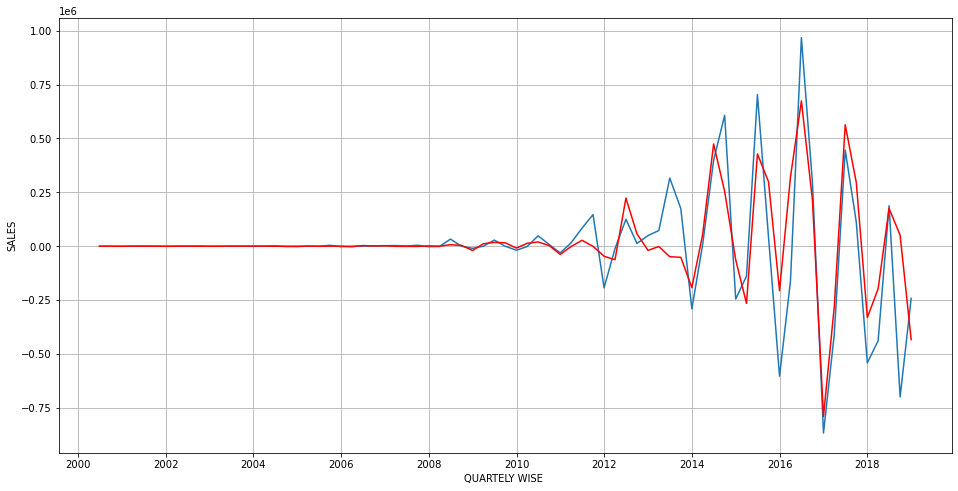

In [57]:
plt.figure(figsize=(16,8))
model = ARIMA(df_patio_quaterly_diff,order=(3,0,3))
results_ARIMA = model.fit()
plt.plot(df_patio_quaterly_diff)
plt.plot(results_ARIMA.fittedvalues,color = "red");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES")
plt.show()

In [58]:
p=3;d=1;q=3

m2 = ARIMA(df_patio_quaterly,order=(p,d,q)).fit()

In [59]:
# forecast on the test data
start = 0
end = 77
checking = m2.predict(start,end)
checking

2000-03-31         0.000000
2000-06-30         4.018690
2000-09-30       596.062528
2000-12-31      -249.627268
2001-03-31       248.151358
                  ...      
2018-06-30    928858.290155
2018-09-30    991972.806147
2018-12-31   -198125.475164
2019-03-31    135085.278485
2019-06-30   -321059.321614
Freq: Q-DEC, Name: predicted_mean, Length: 78, dtype: float64

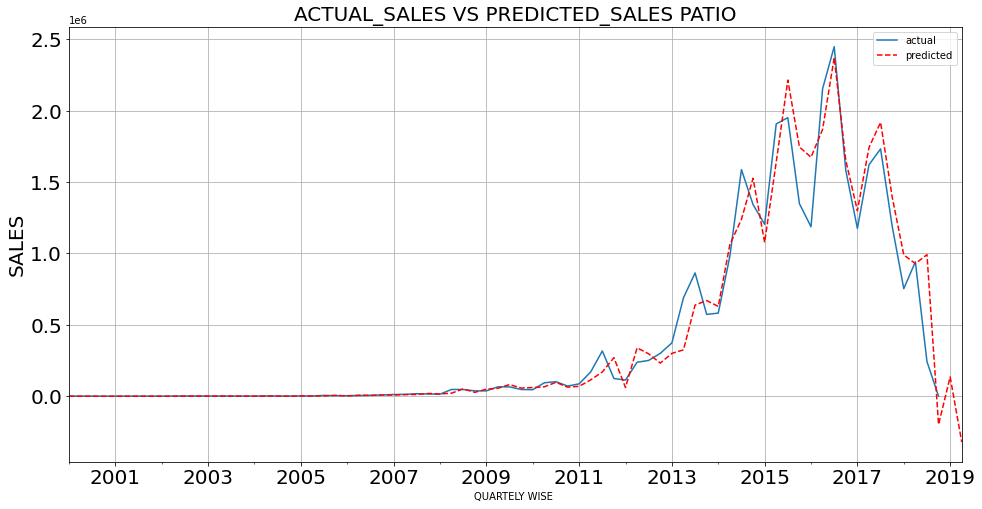

In [60]:
df_patio_quaterly.plot(figsize=(16,8),legend=True)
checking.plot(legend=True,linestyle = "dashed",color = "red");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.title("ACTUAL_SALES VS PREDICTED_SALES PATIO",fontsize=20)
plt.legend(["actual",'predicted']);

In [61]:
# forecast on the test data
start = 74
end = 80
predicting_future = m2.predict(start,end)
predicting_future

2018-09-30    9.919728e+05
2018-12-31   -1.981255e+05
2019-03-31    1.350853e+05
2019-06-30   -3.210593e+05
2019-09-30   -9.529456e+05
2019-12-31   -1.181947e+06
2020-03-31   -1.243555e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64

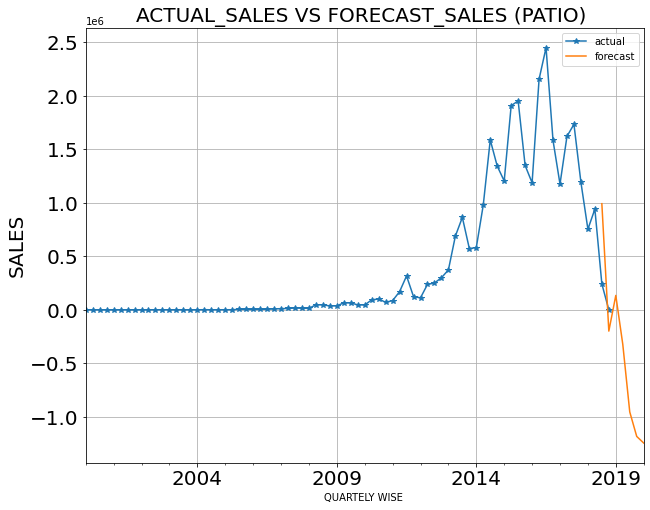

In [62]:
df_patio_quaterly.plot(figsize=(10,8),legend=True,marker = '*')
predicting_future.plot(legend=True);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.title("ACTUAL_SALES VS FORECAST_SALES (PATIO) ",fontsize=20)
plt.legend(["actual",'forecast']);

In [63]:
df_patio_quaterly.shape

(76, 1)

In [64]:
## 

# DEMAND ANALYSIS 

In [65]:
demand_patio = pd.read_csv("PATIO_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [66]:
# Converting to datetime dtype
demand_patio['DATE']=pd.to_datetime(demand_patio['DATE'])

# Sorting values by date
demand_patio.sort_values(by='DATE',inplace=True)
demand_patio=demand_patio.set_index('DATE')
demand_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
2000-03-15,Earthway 2750 Hand-Operated Bag Spreader/Seede...,Earthway,Amazon Home,3.330000,B0009GZA6O,A1B3GNO9C8YX0N,5.0,False,I use one of these to broadcast the various gr...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...


In [67]:
demand_patio_quaterly=demand_patio['product_id'].resample('Q').count()

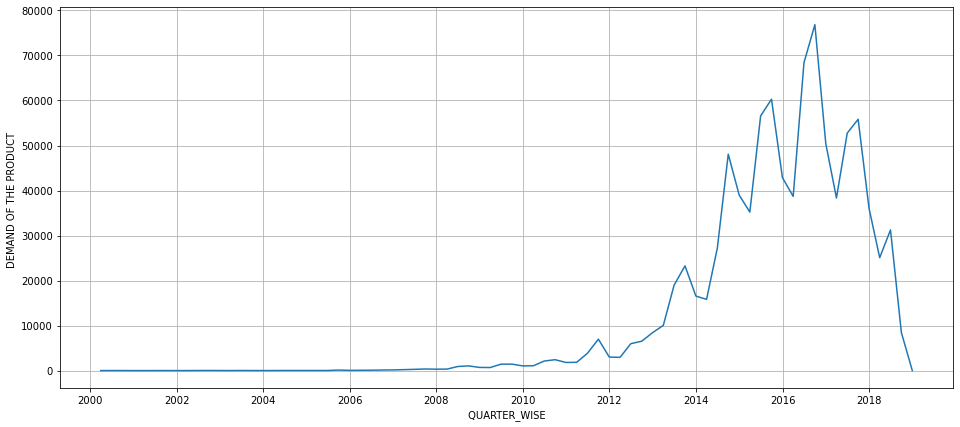

In [68]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("DEMAND OF THE PRODUCT ")
ax1.plot(demand_patio_quaterly);

In [69]:
# STATIONARITY CHECK 

In [70]:
adfuller_test(demand_patio_quaterly)

ADF Test Statistic : -1.7406146188100173
p-value : 0.4103173554973095
#Lags Used : 12
Number of Observations Used : 63
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [71]:
# FINDING THE BEST VALUE OF P D AND Q 

In [72]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(demand_patio_quaterly,Trace = True,
                         suppress_warnings=True)

In [73]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(4, 1, 5)   Log Likelihood                -734.996
Date:                Sun, 15 Jan 2023   AIC                           1489.992
Time:                        23:16:04   BIC                           1513.167
Sample:                    03-31-2000   HQIC                          1499.246
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1744      0.337      0.517      0.605      -0.486       0.835
ar.L2         -0.3612      0.282     -1.279      0.201      -0.915       0.192
ar.L3          0.4913      0.263      1.867      0.062      -0.025       1.007
ar.L4          0.4260      0.272      1.563      0.118      -0.108       0.960
ma.L1         -0.0344      0.404     -0.085      0.932      -0.826       0.757
ma.L2         -0.2953      0.202     -1.463      0.143      -0.691       0.100
ma.L3         -0.1822      0.248     -0.735      0.462      -0.668       0.304
ma.L4          0.0003      0.184      0.001      0.999      -0.361       0.361
ma.L5          0.8091      0.140      5.763      0.000       0.534       1.084
sigma2      2.497e+07   4.49e-08   5.56e+14      0.000     2.5e+07     2.5e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                82.83
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):           50013.93   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.71e+30. Standard errors may be unstable.
"""

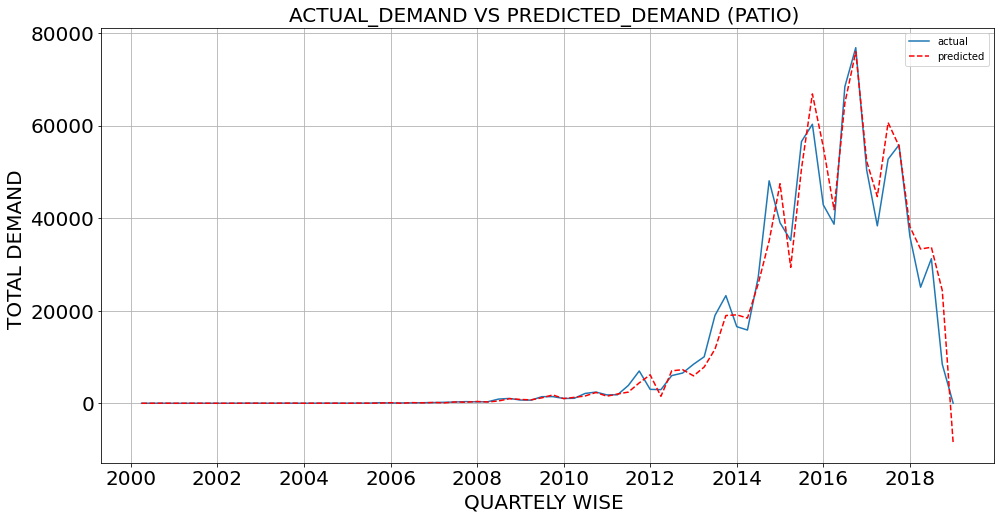

In [74]:
plt.figure(figsize=(16,8))
model= ARIMA(demand_patio_quaterly,order=(4,1,5))
results_ARIMA = model.fit()
plt.plot(demand_patio_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ",fontsize=20)
plt.ylabel("TOTAL DEMAND ",fontsize=20)
plt.legend(["actual",'predicted']);
plt.title("ACTUAL_DEMAND VS PREDICTED_DEMAND (PATIO) ",fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [75]:
p=4;d=1;q=5

p_D_tool = ARIMA(demand_patio_quaterly,order=(p,d,q)).fit()

In [76]:
# forecast on the test data
start = 75
end = 78
patio_demand = p_D_tool.predict(start,end)
patio_demand

2018-12-31    -8590.917521
2019-03-31     8284.012001
2019-06-30    -2077.851963
2019-09-30   -24307.770483
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [77]:
# sb.set_theme(style='darkgrid') 

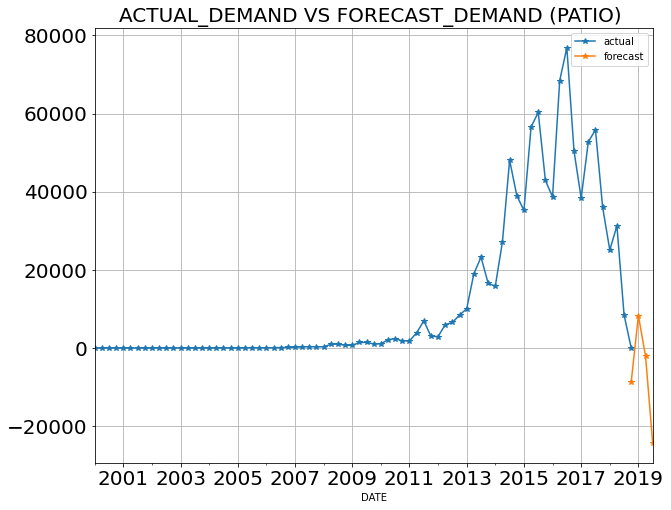

In [78]:
demand_patio_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
patio_demand.plot(legend=True,marker = "*");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["actual",'forecast']);

plt.title("ACTUAL_DEMAND VS FORECAST_DEMAND (PATIO) ",fontsize=20);

In [ ]:
demand_patio_quaterly.plot();

In [82]:
demand_patio_quaterly.sort_values(ascending = False)

DATE
2016-09-30    76840
2016-06-30    68416
2015-09-30    60290
2015-06-30    56557
2017-09-30    55823
              ...  
2002-03-31        6
2001-12-31        4
2000-12-31        2
2000-03-31        1
2001-03-31        0
Name: product_id, Length: 76, dtype: int64

# DATE
# 2016-09-30    76840

In [83]:
# pos = demand_patio_quaterly.index.between("1999-11-08","2016-09-30")

In [84]:
pos = demand_patio_quaterly.copy()

In [85]:
pos.reset_index()

,DATE,product_id
0,2000-03-31,1
1,2000-06-30,16
2,2000-09-30,12
3,2000-12-31,2
4,2001-03-31,0
...,...,...
71,2017-12-31,36040
72,2018-03-31,25080
73,2018-06-30,31243
74,2018-09-30,8440


In [86]:
pos.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 76 entries, 2000-03-31 to 2018-12-31
Freq: Q-DEC
Series name: product_id
Non-Null Count  Dtype
--------------  -----
76 non-null     int64
dtypes: int64(1)
memory usage: 3.2 KB


In [87]:
pos = pos.to_frame()

In [88]:
# pos = demand_patio_quaterly.index.between("1999-11-08","2016-09-30")

In [89]:
pos.sort_index()

,product_id
DATE,
2000-03-31,1
2000-06-30,16
2000-09-30,12
2000-12-31,2
2001-03-31,0
...,...
2017-12-31,36040
2018-03-31,25080
2018-06-30,31243


In [90]:
before = pos['1999-11-08':'2016-09-30']

<AxesSubplot:xlabel='DATE'>

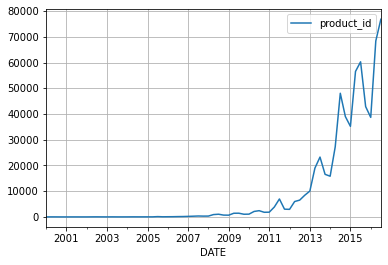

In [91]:
before.plot()

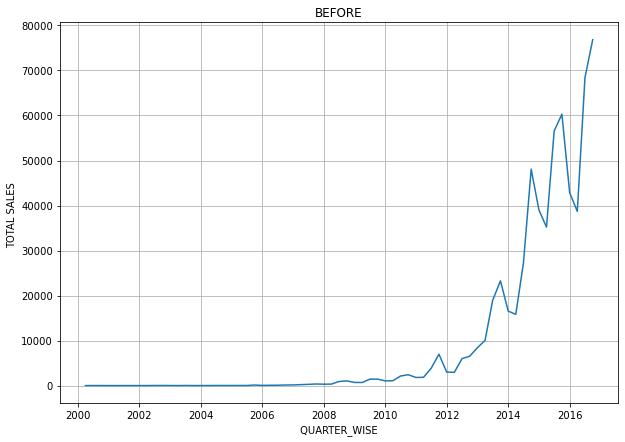

In [92]:
plt.figure(figsize=(10,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
plt.title("BEFORE")
ax1.plot(before);

In [93]:
after = pos['2016-09-30':'2018-12-31']

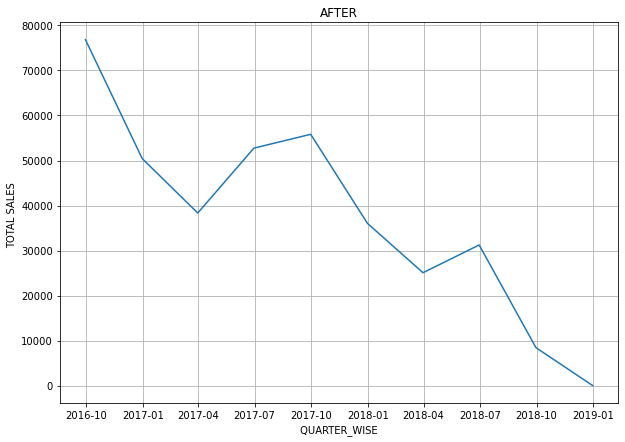

In [94]:
plt.figure(figsize=(10,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
plt.title("AFTER")
ax1.plot(after,);

<AxesSubplot:xlabel='DATE'>

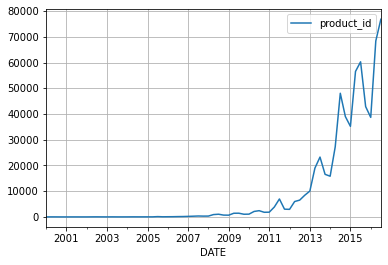

In [95]:
before.plot(kind="line",)

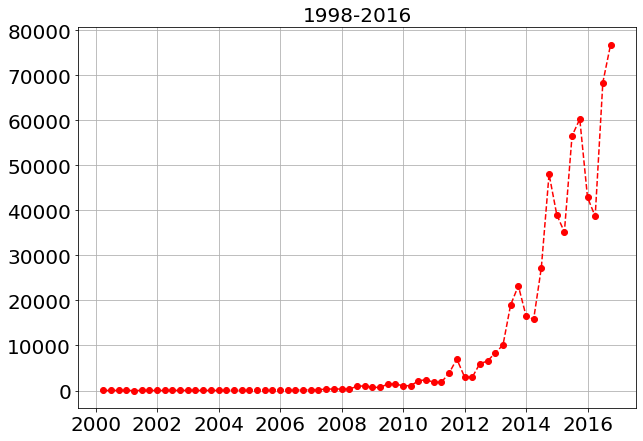

In [98]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("1998-2016",fontsize = 20)
plt.plot(before,color = "red",linestyle = "--",marker  = "o");

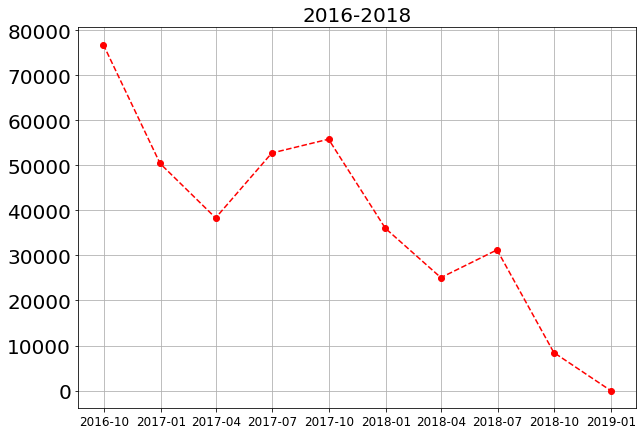

In [99]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.title("2016-2018",fontsize = 20)
plt.plot(after,color = "red",linestyle = "--",marker  = "o");